In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(iris_df)

In [5]:
scaled_features[:6,]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993]])

In [6]:
sum_of_squares = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init=1, random_state=42)
    km.fit(scaled_features)
    sum_of_squares.append(km.inertia_)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
sum_of_squares

[600.0000000000001,
 222.36170496502308,
 191.02473685317972,
 114.35407164049776,
 91.04766991109528,
 81.55075699571756,
 80.77773933734284,
 64.42674849482269,
 55.70690047933692,
 51.12109539650555]

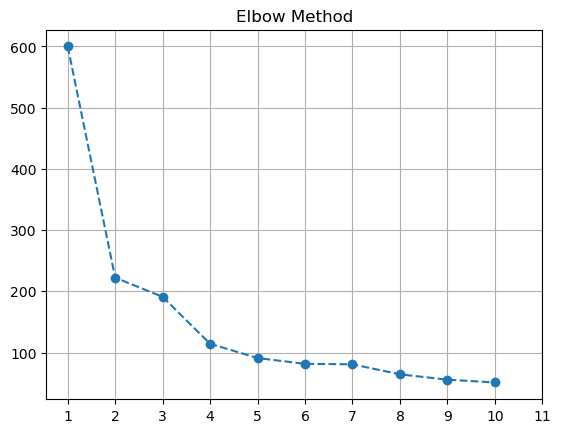

In [8]:
plt.plot(range(1,11),sum_of_squares, marker = 'o', linestyle = '--')
plt.xticks(range(1, 12))
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
kmeans.inertia_

191.02473685317972

In [20]:
kmeans.cluster_centers_

array([[ 0.57100359, -0.37176778,  0.69111943,  0.66315198],
       [-0.81623084,  1.31895771, -1.28683379, -1.2197118 ],
       [-1.32765367, -0.373138  , -1.13723572, -1.11486192]])

In [21]:
pred = kmeans.fit_predict(scaled_features)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
output = iris_df
output['cluster'] = pred
output['target'] = iris.target
output['pred'] = kmeans.fit_predict(scaled_features)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
print(output['pred'],output['target'])

0      1
1      2
2      2
3      2
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: pred, Length: 150, dtype: int32 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


In [15]:
output.cluster.unique

<bound method Series.unique of 0      1
1      2
2      2
3      2
4      1
      ..
145    0
146    3
147    0
148    0
149    0
Name: cluster, Length: 150, dtype: int32>